In [57]:
import pandas as pd


In [58]:
import numpy as np

In [59]:
import matplotlib.pyplot as plt

In [60]:
import seaborn as sns

In [61]:
%matplotlib inline

In [62]:
train = pd.read_csv('train.csv')

In [63]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


doing some exploratory data analysis! firstly checking out missing data
using seaborn to create a simple heatmap to see where we have missing data!

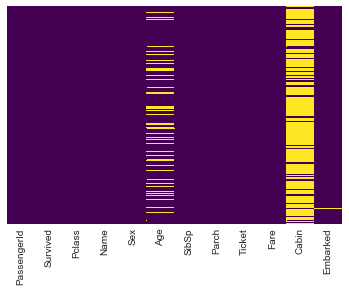

In [64]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')


Around 20 percent of the Age data is missing.
Too much data missing in the  Cabin column.

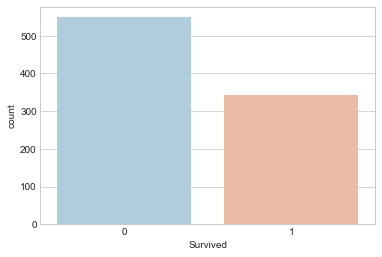

In [65]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')   #A count plot can be thought of as a histogram across a categorical variable

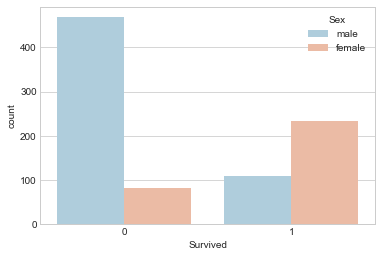

In [66]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

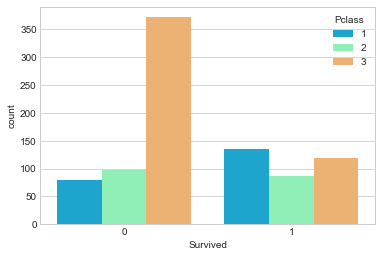

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

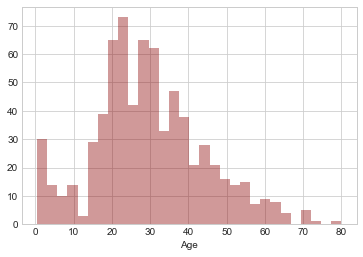

In [14]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

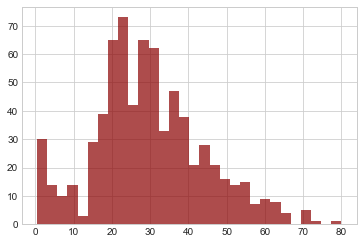

In [17]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)
                                    

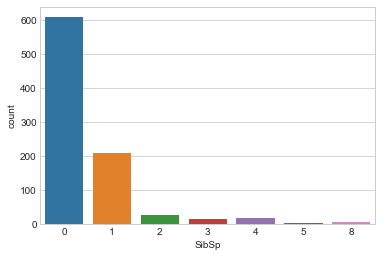

In [18]:
sns.countplot(x='SibSp',data=train)

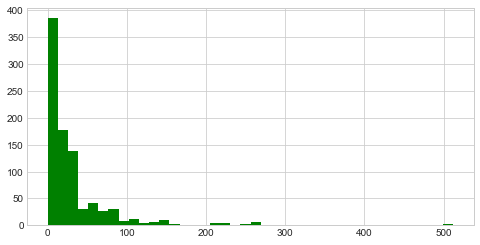

In [19]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

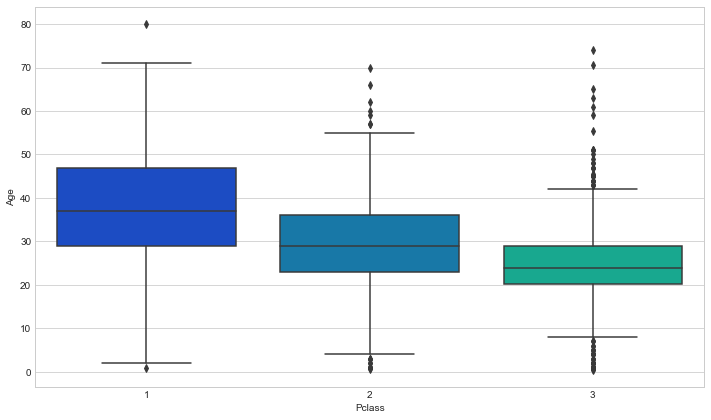

In [48]:
#Data Cleaning..filling in missing age data instead of just dropping the missing age data. we will fill in the mean age of all the passengers.checking the average age by passenger class. 
plt.figure(figsize=(12, 7))                                  
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older. We'll use these average age values to impute based on Pclass for Age.

In [67]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [68]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

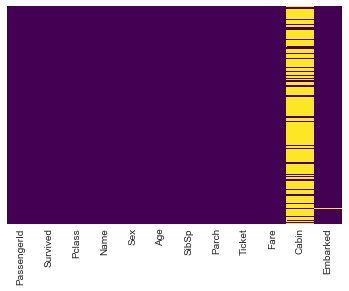

In [69]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') #checking the heat map again

In [70]:
train.drop('Cabin',axis=1,inplace=True)   # dropping the cabin column

In [27]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [28]:
train.dropna(inplace=True)

 converting categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [31]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [32]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [33]:
train = pd.concat([train,sex,embark],axis=1)

In [35]:
train.head()



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [36]:
from sklearn.model_selection import train_test_split      #LOGISTIC REGRESSION
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
predictions = logmodel.predict(X_test)

In [40]:
from sklearn.metrics import classification_report  #We can check precision,recall,f1-score using classification report!

In [42]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.81      0.93      0.86       163
          1       0.85      0.65      0.74       104

avg / total       0.82      0.82      0.81       267

